# Set path - Init 

In [1]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 

import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


# I ) Fitting w/o background signal 

In [2]:
#first we need to generate some data ...

N_events=10000

toy_signalSM=toy('SM')
toy_signalNP=toy('NP')

toy_signalSM.generate(events=N_events , verbose=True)
toy_signalNP.generate(events=N_events , verbose=True)


Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.585284233093262
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.448504686355591


In [3]:
print(toy_signalSM.events)

tf.Tensor(
[[ 4.4971237  -0.7631216   0.28151107  2.8995092 ]
 [ 1.0832195  -0.5274925   0.76721144 -0.3945012 ]
 [ 1.402818   -0.9175658   0.16972208  2.8852074 ]
 ...
 [ 4.720468    0.4316342   0.3447497  -1.657867  ]
 [ 4.7729683   0.52130914 -0.08381844 -0.6096735 ]
 [ 4.1859674  -0.76096296  0.17111611 -0.9497161 ]], shape=(10000, 4), dtype=float32)


In [49]:
#perform fits using the migrad routine (minuit) and AMSGrad (tensorflow)
FX=fix_array
betas1=[0.5 , 0.55 , 0.6 , 0.75 , 0.8 , 0.85 , 0.9 , 0.95]
opt_params= {'beta_1': betas1[0]}
optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=FX , verbose=True , opt_params=opt_params)

INIT=toy_signalSM.coeff_init 
print(INIT)
for j in range(1 ,len(betas1)):
    print(j)
    opt_params= {'beta_1': betas1[j]}

    optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=FX , coefini=INIT ,  verbose=False , opt_params=opt_params)

    print(optimizerTF.optimizer.get_config())

    INIT=toy_signalSM.coeff_init 
optimizeMigrad , coeffMigrad = toy_signalSM.minuitfit(init= 'SAME SIGN' , fixed=FX , coefini=INIT, verbose=True)



 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for tensorflow fit: [-0.97759724, -0.009233087, 3.4424338, 0.009711499, -0.00013177143, 0.4612594, -0.111095846, -0.0020311968, 11.053458, 0.311223, -0.0018272102, -0.20834965, 6.898884, 0.15879267, -15.912938, -0.039127618, 0.003364127, -0.09463596, -0.6309227, 0.054392975, -1.3920212, 0.0, 0.0, 0.0, 5.151928, -0.11897318, 11.505583, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.931005, 0.0, 0.0, 1.3314941, 0.0, 0.0, 1.4137654, 0.0, 0.0, 1.7590878, 0.0, 0.0]


KeyboardInterrupt: 

In [9]:
X=[]
print(fix_array)
fix_array=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
print(fix_array)
for j in tqdm(range(50)):
    optimizeMigrad , coeffff = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=fix_array , verbose=False)
    X.append(coeffff)
    print('ID : ',toy_signalSM.coeffs)
    print('FIT :', coeffff)
X=np.asarray(X)


  0%|          | 0/50 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


  2%|▏         | 1/50 [00:09<07:23,  9.06s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.2974257, -0.1309552, 5.744629, -0.22799993, 0.02801118, 0.4587193, -0.19505964, -0.07186007, 7.409316, 2.0375874, -0.46249267, -1.7615683, 3.7596524, 0.021973433, -7.3558526, 1.0304693, -0.16168247, -1.6519755, -0.031826787, -0.013527558, -6.8340797, 0.0, 0.0, 0.0, 5.738606, -0.13865766, 8.818988, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8433994, 0.0, 0.0, 0.43477565, 0.0, 0.0, 1.1638147, 0.0, 0.0, 0.83105755, 0.0, 0.0]


  4%|▍         | 2/50 [00:26<09:08, 11.43s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.5649266, -0.18210398, 7.9502873, -0.3160655, 0.038831666, 0.6356672, -0.33444887, -0.09018202, 10.351988, 2.831294, -0.64247924, -2.4487996, 5.206774, 0.031264644, -10.192353, 1.4252962, -0.22354007, -2.2877984, -0.10743659, -0.009373742, -9.392409, 0.0, 0.0, 0.0, 7.9539595, -0.19211642, 12.225109, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.169266, 0.0, 0.0, 0.60070485, 0.0, 0.0, 1.6134235, 0.0, 0.0, 1.1506559, 0.0, 0.0]


  6%|▌         | 3/50 [00:37<08:53, 11.35s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.4718032, -0.13861665, 6.0464563, -0.24082644, 0.029598624, 0.48374897, -0.25594932, -0.06837319, 7.8774114, 2.1195426, -0.48477182, -1.8143255, 3.9595895, 0.023955265, -7.751649, 1.0805565, -0.16957489, -1.7376469, -0.07965277, -0.0073343595, -7.1472077, 0.0, 0.0, 0.0, 6.049853, -0.1460266, 9.301305, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.88945264, 0.0, 0.0, 0.4556748, 0.0, 0.0, 1.2283638, 0.0, 0.0, 0.8754831, 0.0, 0.0]


  8%|▊         | 4/50 [00:44<07:39,  9.99s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.937708, -0.19828457, 8.600359, -0.34309277, 0.042143874, 0.68959266, -0.38560236, -0.09422065, 11.245288, 3.03967, -0.69248146, -2.61505, 5.64024, 0.034021895, -11.042164, 1.5356232, -0.24099027, -2.4688318, -0.12725016, -0.00864262, -10.160094, 0.0, 0.0, 0.0, 8.61758, -0.20818675, 13.243792, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2667787, 0.0, 0.0, 0.6499626, 0.0, 0.0, 1.748423, 0.0, 0.0, 1.246374, 0.0, 0.0]


 10%|█         | 5/50 [00:57<08:15, 11.02s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.483583, -0.17843427, 7.8111343, -0.31039202, 0.038139332, 0.6242198, -0.26786548, -0.09746864, 10.084423, 2.764697, -0.628525, -2.3854983, 5.1176357, 0.029582486, -10.011734, 1.4016165, -0.2199377, -2.2478068, -0.04876282, -0.017587045, -9.290258, 0.0, 0.0, 0.0, 7.807401, -0.18864788, 11.998205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1474451, 0.0, 0.0, 0.5909659, 0.0, 0.0, 1.5837504, 0.0, 0.0, 1.1305331, 0.0, 0.0]


 12%|█▏        | 6/50 [01:07<07:46, 10.60s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.3273206, -0.21248662, 9.278014, -0.3688457, 0.045315314, 0.74180174, -0.3852612, -0.10608621, 12.074553, 3.3039942, -0.74979407, -2.8577957, 6.076695, 0.036382224, -11.8946295, 1.6637102, -0.26095122, -2.670253, -0.122130774, -0.011484584, -10.963603, 0.0, 0.0, 0.0, 9.281828, -0.22414319, 14.26571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3644214, 0.0, 0.0, 0.70117366, 0.0, 0.0, 1.882818, 0.0, 0.0, 1.3427844, 0.0, 0.0]


 14%|█▍        | 7/50 [01:19<08:00, 11.18s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.621167, -0.14462143, 6.3063273, -0.2507961, 0.0308118, 0.50439125, -0.27646494, -0.06996473, 8.228599, 2.2468953, -0.50976986, -1.9436073, 4.1305375, 0.024946628, -8.086443, 1.1304103, -0.17726673, -1.8148639, -0.09298546, -0.0063814046, -7.4421215, 0.0, 0.0, 0.0, 6.3114247, -0.152457, 9.700061, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9278086, 0.0, 0.0, 0.47662407, 0.0, 0.0, 1.280114, 0.0, 0.0, 0.91284215, 0.0, 0.0]


 16%|█▌        | 8/50 [01:31<08:01, 11.48s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.2217891, -0.1280255, 5.612766, -0.2228248, 0.027375646, 0.44828454, -0.19424246, -0.06970501, 7.2452536, 1.9911187, -0.45195344, -1.72134, 3.6740017, 0.021477593, -7.1884036, 1.0068055, -0.1579649, -1.6141973, -0.034200326, -0.01278432, -6.674133, 0.0, 0.0, 0.0, 5.6078773, -0.13550541, 8.617884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8241873, 0.0, 0.0, 0.42480922, 0.0, 0.0, 1.1372901, 0.0, 0.0, 0.8120494, 0.0, 0.0]


 18%|█▊        | 9/50 [01:42<07:46, 11.37s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.661263, -0.18584284, 8.117055, -0.32256585, 0.039626956, 0.6488091, -0.36359513, -0.088857, 10.597359, 2.8924165, -0.6560739, -2.5026162, 5.309637, 0.03274223, -10.397461, 1.4539399, -0.22798306, -2.3346016, -0.124972925, -0.0074202796, -9.568981, 0.0, 0.0, 0.0, 8.120769, -0.1961633, 12.480773, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1938081, 0.0, 0.0, 0.6131524, 0.0, 0.0, 1.6470108, 0.0, 0.0, 1.174455, 0.0, 0.0]


 20%|██        | 10/50 [01:53<07:27, 11.20s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.2711043, -0.21222399, 9.182766, -0.3660292, 0.044962406, 0.7360768, -0.3892437, -0.103929915, 11.982665, 3.260782, -0.7411222, -2.813619, 6.0314736, 0.035440356, -11.804107, 1.6464319, -0.25825393, -2.6440885, -0.11932127, -0.011743132, -10.87394, 0.0, 0.0, 0.0, 9.204937, -0.22237378, 14.1468115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3531002, 0.0, 0.0, 0.69542104, 0.0, 0.0, 1.8671807, 0.0, 0.0, 1.3316412, 0.0, 0.0]


 22%|██▏       | 11/50 [02:03<06:57, 10.70s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-6.342815, -0.2501883, 11.047231, -0.4377155, 0.05380027, 0.8806816, -0.3786823, -0.13757072, 14.235461, 3.919172, -0.889503, -3.3896997, 7.2130313, 0.043138657, -14.116145, 1.9787112, -0.31054, -3.1724503, -0.07123856, -0.024378795, -13.112706, 0.0, 0.0, 0.0, 11.020695, -0.26634344, 16.937347, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6197681, 0.0, 0.0, 0.83429575, 0.0, 0.0, 2.235364, 0.0, 0.0, 1.5958492, 0.0, 0.0]


 24%|██▍       | 12/50 [02:10<06:03,  9.56s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.394444, -0.2111336, 9.393542, -0.37193504, 0.045699134, 0.7478835, -0.3173873, -0.1174403, 12.07925, 3.3164954, -0.75418776, -2.8615582, 6.115959, 0.03751358, -11.972247, 1.677929, -0.26341048, -2.6912298, -0.056624398, -0.021072578, -11.137812, 0.0, 0.0, 0.0, 9.355605, -0.22598282, 14.3787565, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3750162, 0.0, 0.0, 0.70741904, 0.0, 0.0, 1.8980602, 0.0, 0.0, 1.3548394, 0.0, 0.0]


 26%|██▌       | 13/50 [02:23<06:36, 10.72s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.588115, -0.18266791, 7.9919643, -0.3174622, 0.039001636, 0.63862705, -0.3053516, -0.095152386, 10.360342, 2.8406713, -0.6446247, -2.456515, 5.232356, 0.031020137, -10.240025, 1.4333394, -0.22483894, -2.2992868, -0.076957785, -0.014066767, -9.473764, 0.0, 0.0, 0.0, 7.990495, -0.19303493, 12.279912, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1744604, 0.0, 0.0, 0.60448, 0.0, 0.0, 1.6205978, 0.0, 0.0, 1.1564772, 0.0, 0.0]


 28%|██▊       | 14/50 [02:31<06:01, 10.04s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.9691575, -0.15758523, 6.914905, -0.27442622, 0.033715945, 0.55212027, -0.23327859, -0.08672545, 8.916199, 2.452596, -0.55665386, -2.1205192, 4.5255504, 0.026394587, -8.854088, 1.2406386, -0.19465335, -1.9887596, -0.036670964, -0.016543414, -8.227516, 0.0, 0.0, 0.0, 6.9071717, -0.16690297, 10.614579, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0151261, 0.0, 0.0, 0.5233868, 0.0, 0.0, 1.4007517, 0.0, 0.0, 1.0003258, 0.0, 0.0]


 30%|███       | 15/50 [02:42<05:52, 10.08s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.2656803, -0.21249218, 9.174997, -0.365789, 0.044935476, 0.73567235, -0.37083894, -0.10662675, 11.954308, 3.2634342, -0.7410771, -2.8188248, 6.0333405, 0.034746706, -11.804618, 1.6494868, -0.25867242, -2.6472604, -0.10452232, -0.014024468, -10.886437, 0.0, 0.0, 0.0, 9.200434, -0.22228509, 14.139529, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3523706, 0.0, 0.0, 0.6959287, 0.0, 0.0, 1.8660166, 0.0, 0.0, 1.331226, 0.0, 0.0]


 32%|███▏      | 16/50 [02:52<05:44, 10.14s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.7717419, -0.14936376, 6.5701423, -0.26062813, 0.032022547, 0.52429044, -0.22683533, -0.0816036, 8.474333, 2.3266964, -0.52842724, -2.0098934, 4.2955604, 0.025363386, -8.405357, 1.1775532, -0.18476346, -1.8881403, -0.038790915, -0.015106964, -7.808615, 0.0, 0.0, 0.0, 6.559064, -0.15842819, 10.08132, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9640584, 0.0, 0.0, 0.4967941, 0.0, 0.0, 1.3303664, 0.0, 0.0, 0.94992113, 0.0, 0.0]


 34%|███▍      | 17/50 [03:01<05:20,  9.71s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.8290744, -0.19515695, 8.413097, -0.33633152, 0.041343704, 0.6752453, -0.35399833, -0.09589645, 10.987656, 2.948199, -0.67518663, -2.5176911, 5.5352225, 0.032046966, -10.831194, 1.5107753, -0.23699114, -2.4295099, -0.11192442, -0.010265761, -9.968271, 0.0, 0.0, 0.0, 8.441644, -0.2039051, 12.974756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.240887, 0.0, 0.0, 0.63587356, 0.0, 0.0, 1.7139372, 0.0, 0.0, 1.2213336, 0.0, 0.0]


 36%|███▌      | 18/50 [03:08<04:49,  9.04s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.97572, -0.15898564, 6.9255905, -0.27620474, 0.033943143, 0.5546618, -0.26855555, -0.08194261, 8.992738, 2.411552, -0.553205, -2.055859, 4.539479, 0.026909903, -8.884118, 1.2354031, -0.19402102, -1.9871203, -0.067822285, -0.011845109, -8.216793, 0.0, 0.0, 0.0, 6.92934, -0.16716066, 10.6564245, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0188085, 0.0, 0.0, 0.5222944, 0.0, 0.0, 1.4074816, 0.0, 0.0, 1.0033959, 0.0, 0.0]


 38%|███▊      | 19/50 [03:18<04:43,  9.15s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-6.2188954, -0.25088367, 10.836463, -0.43177208, 0.053037293, 0.86856955, -0.4340771, -0.12644829, 14.111433, 3.857018, -0.8753604, -3.3338327, 7.122681, 0.041259147, -13.936606, 1.948401, -0.3055262, -3.126449, -0.118255734, -0.017354375, -12.862347, 0.0, 0.0, 0.0, 10.864755, -0.26250952, 16.69707, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5969887, 0.0, 0.0, 0.82222545, 0.0, 0.0, 2.2033365, 0.0, 0.0, 1.5721755, 0.0, 0.0]


 40%|████      | 20/50 [03:30<05:02, 10.10s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-6.094457, -0.24451578, 10.613623, -0.4227788, 0.051936895, 0.8500397, -0.4914326, -0.114049874, 13.897812, 3.773595, -0.8577029, -3.2568007, 6.9585695, 0.04231418, -13.62498, 1.8998166, -0.29797938, -3.0530903, -0.18130985, -0.007022476, -12.508559, 0.0, 0.0, 0.0, 10.634493, -0.25685757, 16.344986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5634269, 0.0, 0.0, 0.8017446, 0.0, 0.0, 2.157524, 0.0, 0.0, 1.5376452, 0.0, 0.0]


 42%|████▏     | 21/50 [03:41<05:02, 10.44s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.0750546, -0.122746274, 5.3556175, -0.21294169, 0.026161214, 0.42827842, -0.22579928, -0.060703065, 6.9751024, 1.906814, -0.43269348, -1.649105, 3.5078986, 0.021057341, -6.866756, 0.9601699, -0.15058678, -1.5412182, -0.07139699, -0.006503371, -6.3287163, 0.0, 0.0, 0.0, 5.358731, -0.12943587, 8.23617, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7877492, 0.0, 0.0, 0.40482476, 0.0, 0.0, 1.0869387, 0.0, 0.0, 0.77523154, 0.0, 0.0]


 44%|████▍     | 22/50 [03:51<04:46, 10.23s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.525624, -0.18110463, 7.8813624, -0.31378433, 0.038557764, 0.63070655, -0.3406289, -0.08826649, 10.284305, 2.7959511, -0.63630444, -2.4093006, 5.168035, 0.030893864, -10.1164465, 1.4129776, -0.22163968, -2.2699225, -0.12197425, -0.00697435, -9.299858, 0.0, 0.0, 0.0, 7.889281, -0.19020799, 12.135482, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1602532, 0.0, 0.0, 0.5948804, 0.0, 0.0, 1.6017463, 0.0, 0.0, 1.1415346, 0.0, 0.0]


 46%|████▌     | 23/50 [03:59<04:17,  9.55s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.405465, -0.2110549, 9.409442, -0.3721444, 0.045730565, 0.74850553, -0.36057207, -0.111373484, 12.152265, 3.3391793, -0.7578517, -2.8889601, 6.121361, 0.038236644, -11.986745, 1.6793007, -0.26355428, -2.6941783, -0.09783895, -0.015014985, -11.1034155, 0.0, 0.0, 0.0, 9.369987, -0.22630808, 14.401507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3773187, 0.0, 0.0, 0.7076702, 0.0, 0.0, 1.900844, 0.0, 0.0, 1.356163, 0.0, 0.0]


 48%|████▊     | 24/50 [04:06<03:52,  8.92s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.0367785, -0.16279164, 7.0336876, -0.28107372, 0.034544725, 0.56445193, -0.28410363, -0.08172669, 9.162678, 2.4644656, -0.56362385, -2.1083033, 4.6223454, 0.026879346, -9.044721, 1.2621347, -0.1979823, -2.02851, -0.07277824, -0.011745936, -8.353157, 0.0, 0.0, 0.0, 7.0521674, -0.17040055, 10.8374, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0365144, 0.0, 0.0, 0.53239703, 0.0, 0.0, 1.4311186, 0.0, 0.0, 1.0206332, 0.0, 0.0]


 50%|█████     | 25/50 [04:14<03:32,  8.50s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.1908264, -0.2086424, 9.042807, -0.36131686, 0.044414256, 0.7251732, -0.3722485, -0.10403505, 11.783898, 3.1465788, -0.7226105, -2.6783378, 5.9355745, 0.035122115, -11.61689, 1.6169847, -0.25381964, -2.6020372, -0.10852277, -0.012584612, -10.715973, 0.0, 0.0, 0.0, 9.06163, -0.21888977, 13.927319, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3319646, 0.0, 0.0, 0.6820792, 0.0, 0.0, 1.8402224, 0.0, 0.0, 1.311275, 0.0, 0.0]


 52%|█████▏    | 26/50 [04:26<03:47,  9.49s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.6697946, -0.14620957, 6.3932023, -0.2543953, 0.031266786, 0.51112753, -0.22947657, -0.0782679, 8.269359, 2.2365277, -0.5115002, -1.9145428, 4.18707, 0.024618989, -8.193055, 1.1443585, -0.17962533, -1.8381875, -0.045856036, -0.013417704, -7.598687, 0.0, 0.0, 0.0, 6.3922606, -0.15445675, 9.823337, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93945485, 0.0, 0.0, 0.48262542, 0.0, 0.0, 1.2974316, 0.0, 0.0, 0.9255653, 0.0, 0.0]


 54%|█████▍    | 27/50 [04:35<03:37,  9.45s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.6322246, -0.18552156, 8.067282, -0.32105157, 0.03944035, 0.6456948, -0.36827073, -0.08736281, 10.55082, 2.875584, -0.6522861, -2.4875598, 5.286876, 0.032028306, -10.351028, 1.4460967, -0.22672722, -2.322263, -0.12768835, -0.006944196, -9.515012, 0.0, 0.0, 0.0, 8.079085, -0.19516909, 12.416289, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1876774, 0.0, 0.0, 0.6100799, 0.0, 0.0, 1.6384352, 0.0, 0.0, 1.168322, 0.0, 0.0]


 56%|█████▌    | 28/50 [04:44<03:24,  9.29s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.7526817, -0.23240788, 10.024479, -0.39970648, 0.049100496, 0.8039626, -0.39625818, -0.117815, 13.051636, 3.5659888, -0.8096126, -3.0807984, 6.595472, 0.037623923, -12.902844, 1.8032292, -0.28277668, -2.893405, -0.10461002, -0.016787097, -11.9082155, 0.0, 0.0, 0.0, 10.053959, -0.24292445, 15.450832, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4777873, 0.0, 0.0, 0.76093864, 0.0, 0.0, 2.0389926, 0.0, 0.0, 1.4549097, 0.0, 0.0]


 58%|█████▊    | 29/50 [04:55<03:26,  9.86s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.0178194, -0.20046553, 8.7380905, -0.34760466, 0.042708524, 0.69896287, -0.38599148, -0.09664446, 11.408766, 3.114074, -0.70687777, -2.6924567, 5.724648, 0.034597117, -11.20759, 1.5668099, -0.2457178, -2.5159407, -0.13860719, -0.0073479433, -10.301784, 0.0, 0.0, 0.0, 8.746891, -0.21125805, 13.444062, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2858839, 0.0, 0.0, 0.6599392, 0.0, 0.0, 1.7745146, 0.0, 0.0, 1.2648933, 0.0, 0.0]


 60%|██████    | 30/50 [05:06<03:22, 10.15s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.7563024, -0.18891433, 8.286163, -0.32885796, 0.04040285, 0.6616526, -0.28316584, -0.10342776, 10.690276, 2.9396834, -0.66712785, -2.5419364, 5.423105, 0.031696454, -10.610494, 1.4866264, -0.23323928, -2.3832164, -0.04666751, -0.019477846, -9.8561735, 0.0, 0.0, 0.0, 8.277813, -0.20002761, 12.720772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2165724, 0.0, 0.0, 0.6272875, 0.0, 0.0, 1.6786575, 0.0, 0.0, 1.1987374, 0.0, 0.0]


 62%|██████▏   | 31/50 [05:17<03:16, 10.34s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.5614831, -0.1414997, 6.2046003, -0.2462756, 0.030256344, 0.49549887, -0.21501103, -0.076990925, 8.00888, 2.201614, -0.49958354, -1.9039216, 4.060719, 0.023784967, -7.945194, 1.1130987, -0.17462812, -1.7844684, -0.036438294, -0.014344752, -7.3790946, 0.0, 0.0, 0.0, 6.198873, -0.14980079, 9.525641, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.91102344, 0.0, 0.0, 0.46969658, 0.0, 0.0, 1.2570237, 0.0, 0.0, 0.8976485, 0.0, 0.0]


 64%|██████▍   | 32/50 [05:24<02:52,  9.59s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.3448167, -0.17515722, 7.569171, -0.3021015, 0.037119173, 0.60713804, -0.32217675, -0.08558026, 9.882945, 2.6801865, -0.6103286, -2.3069174, 4.9742136, 0.029139062, -9.73471, 1.3583817, -0.213062, -2.1822302, -0.10312795, -0.008928898, -8.960308, 0.0, 0.0, 0.0, 7.590053, -0.18334305, 11.665512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1157433, 0.0, 0.0, 0.57281494, 0.0, 0.0, 1.5400633, 0.0, 0.0, 1.0979705, 0.0, 0.0]


 66%|██████▌   | 33/50 [05:34<02:41,  9.48s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.5118012, -0.18051395, 7.858023, -0.31258935, 0.03840046, 0.6287285, -0.34193048, -0.08762227, 10.253536, 2.7995138, -0.63506585, -2.4217255, 5.149263, 0.030981254, -10.08033, 1.409113, -0.22096227, -2.262141, -0.11086928, -0.008798963, -9.281831, 0.0, 0.0, 0.0, 7.8669834, -0.19004889, 12.090406, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1564417, 0.0, 0.0, 0.59449095, 0.0, 0.0, 1.595495, 0.0, 0.0, 1.1379037, 0.0, 0.0]


 68%|██████▊   | 34/50 [05:45<02:38,  9.92s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.1804442, -0.20909113, 9.02553, -0.36006865, 0.04424111, 0.72372997, -0.38645804, -0.10171148, 11.789286, 3.1906102, -0.72697324, -2.7436936, 5.931074, 0.034896128, -11.607834, 1.620235, -0.25409386, -2.6032474, -0.120602176, -0.011074458, -10.68862, 0.0, 0.0, 0.0, 9.05229, -0.21869826, 13.91193, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3306394, 0.0, 0.0, 0.6833087, 0.0, 0.0, 1.8366278, 0.0, 0.0, 1.3095282, 0.0, 0.0]


 70%|███████   | 35/50 [05:53<02:21,  9.44s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.9240913, -0.2315711, 10.310132, -0.40789887, 0.050123494, 0.8203397, -0.43788013, -0.11585447, 13.377441, 3.6671796, -0.8320406, -3.174201, 6.7045946, 0.042893622, -13.1340685, 1.8392006, -0.28858146, -2.9525928, -0.14995977, -0.010127448, -12.118951, 0.0, 0.0, 0.0, 10.27242, -0.24805681, 15.78965, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5101565, 0.0, 0.0, 0.77453715, 0.0, 0.0, 2.0841312, 0.0, 0.0, 1.4859716, 0.0, 0.0]


 72%|███████▏  | 36/50 [06:02<02:08,  9.18s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.0766435, -0.20495285, 8.846144, -0.3535949, 0.043463133, 0.70996517, -0.3449859, -0.10468012, 11.511595, 3.0950763, -0.70874316, -2.6437838, 5.81732, 0.033516053, -11.381609, 1.5884439, -0.24921125, -2.5531425, -0.08865017, -0.015081892, -10.512596, 0.0, 0.0, 0.0, 8.871401, -0.21432091, 13.634509, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3039426, 0.0, 0.0, 0.669259, 0.0, 0.0, 1.8009157, 0.0, 0.0, 1.2840571, 0.0, 0.0]


 74%|███████▍  | 37/50 [06:18<02:29, 11.49s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.7712765, -0.15151249, 6.569773, -0.2617936, 0.032166775, 0.5262758, -0.271154, -0.07545654, 8.560418, 2.3278072, -0.52972394, -2.0055642, 4.3129992, 0.02534745, -8.440647, 1.1791477, -0.18494838, -1.8935605, -0.0825624, -0.008739229, -7.779893, 0.0, 0.0, 0.0, 6.582083, -0.15895647, 10.117389, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.96760154, 0.0, 0.0, 0.49700496, 0.0, 0.0, 1.3355441, 0.0, 0.0, 0.9523732, 0.0, 0.0]


 76%|███████▌  | 38/50 [06:30<02:18, 11.53s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.029695, -0.20115398, 8.759117, -0.34850308, 0.04281702, 0.70080394, -0.38654807, -0.09695514, 11.438093, 3.1221924, -0.7086684, -2.6996748, 5.7401304, 0.034625806, -11.237669, 1.5707418, -0.24633498, -2.5222576, -0.13827664, -0.007489753, -10.329476, 0.0, 0.0, 0.0, 8.769778, -0.21181042, 13.479294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2892513, 0.0, 0.0, 0.66174656, 0.0, 0.0, 1.7791144, 0.0, 0.0, 1.2682251, 0.0, 0.0]


 78%|███████▊  | 39/50 [06:39<01:58, 10.73s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.8311944, -0.18869758, 8.411408, -0.3324986, 0.04085725, 0.6689087, -0.30045927, -0.10274441, 10.833511, 2.9821277, -0.6767643, -2.5799847, 5.471917, 0.033974383, -10.713437, 1.5027294, -0.23583598, -2.4097805, -0.06537373, -0.01673205, -9.951542, 0.0, 0.0, 0.0, 8.374767, -0.20230742, 12.871071, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2309227, 0.0, 0.0, 0.63331735, 0.0, 0.0, 1.6987697, 0.0, 0.0, 1.2125648, 0.0, 0.0]


 80%|████████  | 40/50 [06:46<01:37,  9.75s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.4105034, -0.1734411, 7.6813707, -0.3040706, 0.037359968, 0.6117998, -0.2655864, -0.09517936, 9.893505, 2.7230668, -0.6179557, -2.3553631, 5.008099, 0.030416192, -9.802548, 1.3745432, -0.21569207, -2.2037654, -0.048021317, -0.017119385, -9.113477, 0.0, 0.0, 0.0, 7.6575885, -0.18501945, 11.768156, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1254556, 0.0, 0.0, 0.57974017, 0.0, 0.0, 1.5530516, 0.0, 0.0, 1.1089208, 0.0, 0.0]


 82%|████████▏ | 41/50 [06:56<01:27,  9.72s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.043029, -0.16156453, 7.0409303, -0.28005916, 0.034407586, 0.56321335, -0.3103226, -0.07790591, 9.191002, 2.509406, -0.56938314, -2.1705003, 4.6126313, 0.0278575, -9.030351, 1.2624319, -0.19796702, -2.02695, -0.10722371, -0.006612267, -8.306216, 0.0, 0.0, 0.0, 7.047854, -0.17023937, 10.832101, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0360769, 0.0, 0.0, 0.5320622, 0.0, 0.0, 1.4295715, 0.0, 0.0, 1.0193057, 0.0, 0.0]


 84%|████████▍ | 42/50 [07:07<01:20, 10.06s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.0226767, -0.120175585, 5.2657485, -0.20906399, 0.025684485, 0.42061213, -0.18717812, -0.0646992, 6.804755, 1.869503, -0.42421404, -1.6168072, 3.4468014, 0.020237474, -6.74435, 0.94460195, -0.148192, -1.5145808, -0.035951506, -0.011455313, -6.257333, 0.0, 0.0, 0.0, 5.2623186, -0.12719192, 8.085775, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7733583, 0.0, 0.0, 0.3985864, 0.0, 0.0, 1.0670743, 0.0, 0.0, 0.761862, 0.0, 0.0]


 86%|████████▌ | 43/50 [07:18<01:13, 10.44s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.0088305, -0.20044287, 8.723034, -0.3470864, 0.042640787, 0.69801706, -0.39188713, -0.09546146, 11.399534, 3.1088543, -0.7053525, -2.6888878, 5.716102, 0.03456544, -11.191011, 1.5641855, -0.24525775, -2.511673, -0.13595578, -0.007804662, -10.289431, 0.0, 0.0, 0.0, 8.734329, -0.21098362, 13.423776, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.284002, 0.0, 0.0, 0.65949315, 0.0, 0.0, 1.7715248, 0.0, 0.0, 1.2631112, 0.0, 0.0]


 88%|████████▊ | 44/50 [07:28<01:01, 10.24s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.80082, -0.23331645, 10.103746, -0.40254354, 0.049454294, 0.80953866, -0.45410183, -0.11066414, 13.217989, 3.6050541, -0.81796455, -3.1180155, 6.632621, 0.039562274, -12.983627, 1.813832, -0.28440225, -2.9127, -0.1619045, -0.008397524, -11.926021, 0.0, 0.0, 0.0, 10.12797, -0.24462992, 15.56644, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4889206, 0.0, 0.0, 0.7645139, 0.0, 0.0, 2.0543096, 0.0, 0.0, 1.4645764, 0.0, 0.0]


 90%|█████████ | 45/50 [07:36<00:47,  9.57s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.305259, -0.21298595, 9.240079, -0.36795872, 0.045203798, 0.7399825, -0.415879, -0.10106894, 12.084113, 3.2925317, -0.74726045, -2.8463993, 6.0607705, 0.03645134, -11.865183, 1.65764, -0.2599086, -2.6620407, -0.14472084, -0.008189316, -10.905877, 0.0, 0.0, 0.0, 9.2584715, -0.22364342, 14.229474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3610693, 0.0, 0.0, 0.69903004, 0.0, 0.0, 1.8778794, 0.0, 0.0, 1.3389026, 0.0, 0.0]


 92%|█████████▏| 46/50 [09:03<02:11, 32.93s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.466388, -0.17782281, 7.7798824, -0.30905032, 0.03795937, 0.62164515, -0.2965353, -0.09271938, 10.084001, 2.7651196, -0.62750393, -2.391402, 5.093437, 0.030182647, -9.968074, 1.3953073, -0.21887879, -2.2382352, -0.073947184, -0.01382531, -9.223218, 0.0, 0.0, 0.0, 7.778039, -0.18785752, 11.953521, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1432298, 0.0, 0.0, 0.5885766, 0.0, 0.0, 1.5774872, 0.0, 0.0, 1.1257625, 0.0, 0.0]


 94%|█████████▍| 47/50 [09:13<01:17, 25.92s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.5654893, -0.18241976, 7.955116, -0.3166112, 0.038907558, 0.63647133, -0.268128, -0.10000337, 10.271996, 2.8026917, -0.6385813, -2.4106646, 5.218205, 0.029860767, -10.207322, 1.4283118, -0.22412299, -2.2914355, -0.041812684, -0.01913106, -9.478056, 0.0, 0.0, 0.0, 7.957407, -0.19227363, 12.228884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1694629, 0.0, 0.0, 0.60232204, 0.0, 0.0, 1.614417, 0.0, 0.0, 1.1524317, 0.0, 0.0]


 96%|█████████▌| 48/50 [09:25<00:43, 21.62s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.9192216, -0.15585998, 6.8265457, -0.27111825, 0.03330867, 0.5453788, -0.2630739, -0.080925375, 8.850481, 2.4269385, -0.5506439, -2.0991542, 4.467463, 0.026620505, -8.7436, 1.2239786, -0.19199753, -1.9634899, -0.06728832, -0.011779686, -8.08855, 0.0, 0.0, 0.0, 6.8237247, -0.16486539, 10.486916, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0029641, 0.0, 0.0, 0.5162191, 0.0, 0.0, 1.3838757, 0.0, 0.0, 0.9875946, 0.0, 0.0]


 98%|█████████▊| 49/50 [09:37<00:18, 18.89s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.750609, -0.18900004, 8.275232, -0.32877424, 0.04038831, 0.66116416, -0.30391148, -0.10028092, 10.709031, 2.9312336, -0.6663132, -2.5295424, 5.4175367, 0.031949874, -10.601375, 1.4839786, -0.23281205, -2.3807268, -0.069064096, -0.016063116, -9.820563, 0.0, 0.0, 0.0, 8.2715, -0.19973046, 12.711497, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2157123, 0.0, 0.0, 0.6256565, 0.0, 0.0, 1.6778173, 0.0, 0.0, 1.1974239, 0.0, 0.0]


100%|██████████| 50/50 [09:49<00:00, 16.90s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-6.6041255, -0.26399404, 11.501007, -0.4575215, 0.05620857, 0.92010385, -0.5166524, -0.12565382, 15.024925, 4.0993853, -0.93016446, -3.5457087, 7.5338016, 0.045715522, -14.750303, 2.0609062, -0.32317457, -3.3095286, -0.18225978, -0.009594, -13.561513, 0.0, 0.0, 0.0, 11.513172, -0.27808636, 17.69517, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6925678, 0.0, 0.0, 0.86874, 0.0, 0.0, 2.3353202, 0.0, 0.0, 1.6650218, 0.0, 0.0]


In [17]:

names=amplitude_latex_names
print(names)


print(X.shape)


['Re($A_{\\parallel}^L$)', 'Im($A_{\\parallel}^L$)', 'Re($A_{\\parallel}^R$)', 'Im($A_{\\parallel}^R$)', 'Re($A_{\\bot}^L$)', 'Im($A_{\\bot}^L$)', 'Re($A_{\\bot}^R$)', 'Im($A_{\\bot}^R$)', 'Re($A_{0}^L$)', 'Im($A_{0}^L$)', 'Re($A_{0}^R$)', 'Im($A_{0}^R$)', 'Re($A_{00}^L$)', 'Im($A_{00}^L$)', 'Re($A_{00}^R$)', 'Im($A_{00}^R$)']
(50, 48)


[-4.1781025  -0.15184344  6.8183246 ]
[-4.6699834  -0.18639201  8.134201  ]
0
[  5.3284016    0.03175653 -10.42908   ]
4


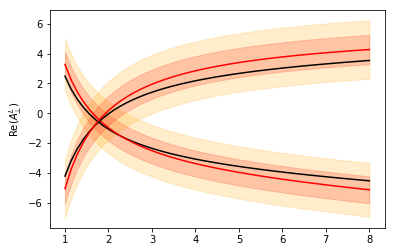

[ 0.00858538 -0.001823    0.4660742 ]
[-1.4579282   0.22870548  2.340456  ]
1
[-2.8836472  0.6555822  2.4877725]
5


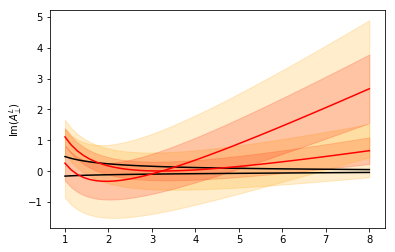

[-2.3538125e-01 -4.3176315e-03  8.0037451e+00]
[-0.32709092 -0.09451768 10.57245   ]
2
[-0.09305214 -0.01212094 -9.630063  ]
6


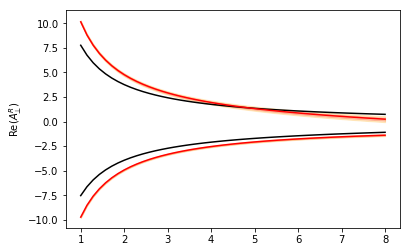

[ 0.16564202 -0.01309588 -0.30668017]
[ 0.32353085 -0.03975097 -0.6505387 ]
3
[0. 0. 0.]
7


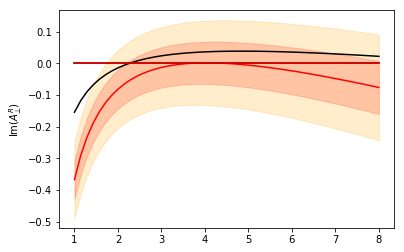

In [27]:
#Want to check for degeneracies 

x=np.linspace(1,8)

#print( toy_signalSM.coeffs[0] , toy_signalSM.coeffs[1] , toy_signalSM.coeffs[2])
#print( np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]))
#print(X)


Average=[]
StandarD=[]
for i in range(48):
    Average.append(np.mean(X[:,i]))
    StandarD.append(np.std(X[:,i]))

AV=np.reshape(Average,(16,3))
STD=np.reshape(StandarD,(16,3))

def ansatz(alpha, beta, gamma, q2):
    return alpha + beta*q2 + gamma/q2

def error1(sig_alpha, sig_beta, sig_gamma, q2):
    return np.sqrt(sig_alpha**2 + sig_beta**2*q2**2 + sig_beta**2/(q2**2))

ID=np.reshape(toy_signalSM.coeffs,(16,3))

OrderI=np.arange(16)
OrderII=np.array([0, 5, 2, 1, 4, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
Pseudo=np.array([1 , -1 , 1 , -1 , 1 , -1 , 1, 1, 1 , 1 , 1 , 1 ,1 ,1 ,1 ,1])





# aproximate degeneracies in A_para_l & (- A_perp_l) ,  A_perp_l & (- A_para_l/2) ,  A_para_r & (- A_perp_r)
# corresponds to 


DEGENERACIES_IDX=[[0,4] ,[1 , 5]  ,  [2,6] , [3,7] ]
Epsilon=[[1 , -1],[1 , -1], [1 , -1] , [1, 1]]



for J in range(len(DEGENERACIES_IDX)):
    id1=DEGENERACIES_IDX[J][0]
    param1=Pseudo[id1]*AV[int(OrderII[id1]),:]
    err1=Pseudo[id1]*STD[int(OrderII[id1]),:]
    ex1=ID[id1,:]

    id2=DEGENERACIES_IDX[J][1]
    param2=Pseudo[id2]*AV[int(OrderII[id2]),:]
    err2=Pseudo[id2]*STD[int(OrderII[id2]),:]
    ex2=ID[id2,:]
    print(ex1)

    PARAM=[param1 , param2]
    ERR=[err1 , err2]
    EX=[ex1,ex2]
    compare=[id1 , id2]


    for j in range(len(compare)):

        id1=compare[j]
        ex1=EX[j]
        param1=PARAM[j]
        print(param1)
        err1=ERR[j]
        print(id1)
        fac=Epsilon[J][j]

        plt.plot(x , fac*ansatz(ex1[0] , ex1[1] , ex1[2] , x) , 'k')

        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - error1(err1[0],err1[1],err1[2], x) , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + error1(err1[0],err1[1],err1[2], x)  , alpha=0.2 , color='red')
        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - 2*error1(err1[0],err1[1],err1[2], x) , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + 2*error1(err1[0],err1[1],err1[2], x)  , alpha=0.2 , color='orange')

        #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
        plt.plot(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x), 'r')
        plt.ylabel(amplitude_latex_names[id1])
    plt.show()



Order : 0
[-4.1781025  -0.15184344  6.8183246 ]


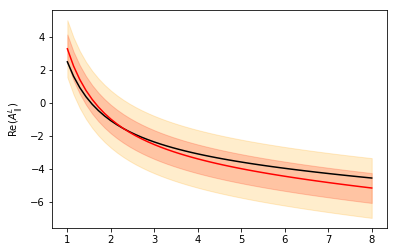

Order : 1
[ 0.00858538 -0.001823    0.4660742 ]


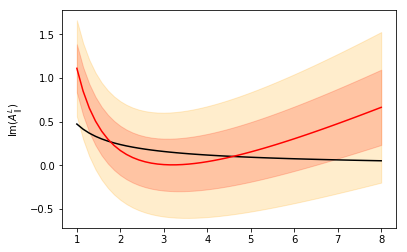

Order : 2
[-2.3538125e-01 -4.3176315e-03  8.0037451e+00]


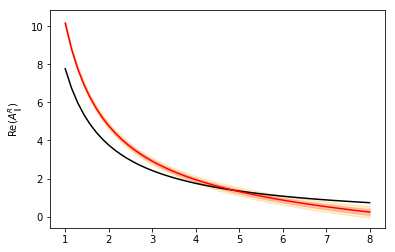

Order : 3
[ 0.16564202 -0.01309588 -0.30668017]


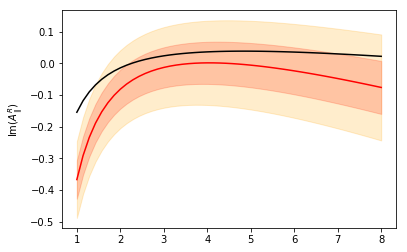

Order : 4
[ 3.8864067   0.08526551 -8.197446  ]


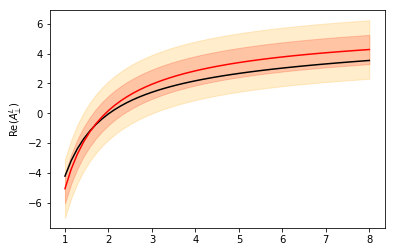

Order : 5
[-0.09505176  0.00793401 -0.07297003]


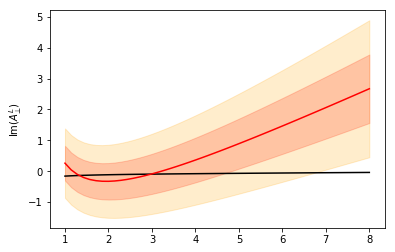

Order : 6
[-0.4235836   0.02729899 -7.147451  ]


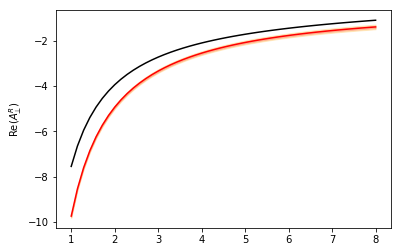

Order : 7
[0. 0. 0.]


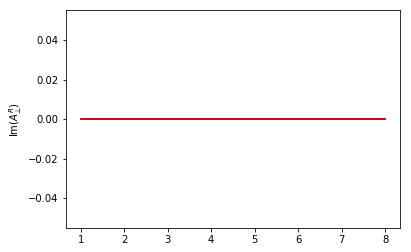

Order : 8
[ 7.202759  -0.2278163  9.89863  ]


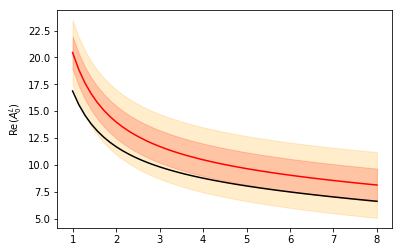

Order : 9
[0. 0. 0.]


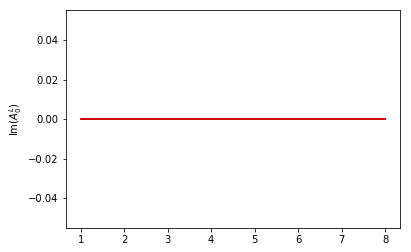

Order : 10
[0. 0. 0.]


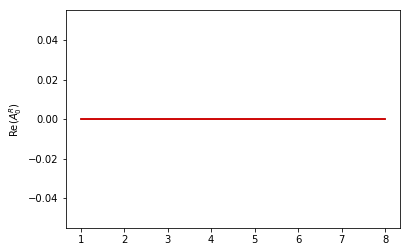

Order : 11
[0. 0. 0.]


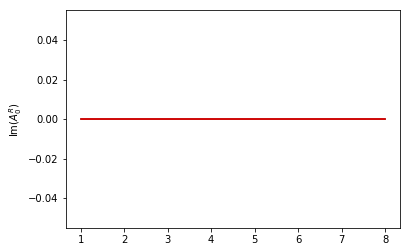

Order : 12
[1. 0. 0.]


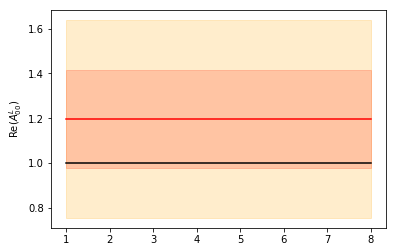

Order : 13
[1. 0. 0.]


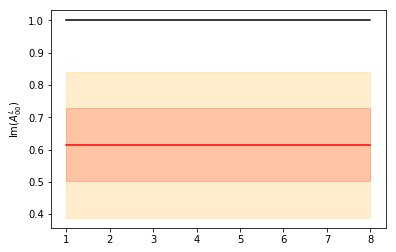

Order : 14
[1. 0. 0.]


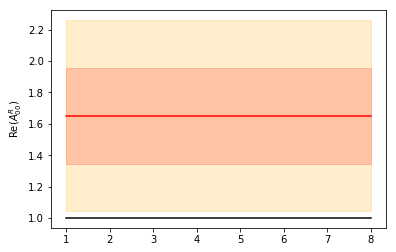

Order : 15
[1. 0. 0.]


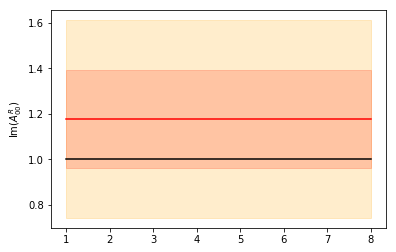

In [18]:

for I in range(16):
    print('Order :', I)
    param=Pseudo[I]*AV[int(OrderII[I]),:]
    err=Pseudo[I]*STD[int(OrderII[I]),:]
    ex=ID[I,:]
    print(ex)
    plt.plot(x , ansatz(ex[0] , ex[1] , ex[2] , x) , 'k')

    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + error1(err[0],err[1],err[2], x)  , alpha=0.2 , color='red')
    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - 2*error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + 2*error1(err[0],err[1],err[2], x)  , alpha=0.2 , color='orange')

    #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
    plt.plot(x , ansatz(param[0] , param[1] , param[2] , x), 'r')
    plt.ylabel(amplitude_latex_names[I])
    plt.show()
#plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) + error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x))


# II ) Testing data generation with background 

In [57]:
from b_meson_fit.optimizer_extended import Optimizer_Extended 
import b_meson_fit.background as background
import b_meson_fit.signal as bmfs 
import tensorflow.compat.v2 as tf 


sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8)
ndat = tf.constant(1000000)
nback = tf.Variable(10000)

coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]

In [58]:
#generate events 

BCK=[back_coeffs[i].numpy() for i in range(len(back_coeffs))]
SIGNAL=[sig_coeffs[i].numpy() for i in range(len(sig_coeffs))]


print('Background coefficients : ', '\n' , BCK , '\n' )
print('Signal coefficients : ' , '\n' ,  SIGNAL , '\n')
events = bmfs.generate_background(BCK,1000,1000000)

events_bck = bmfs.generate_background_mass(BCK)

events_signal= bmfs.generate_signal_mass(SIGNAL)

events = bmfs.generate_all(sig_coeffs, back_coeffs,events_total=100000, alpha = 0.8, poisson = False)

Background coefficients :  
 [100.0, -10.0, 100.0, -80.0, 100.0, -80.0, 100.0, -15.0] 

Signal coefficients :  
 [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0] 



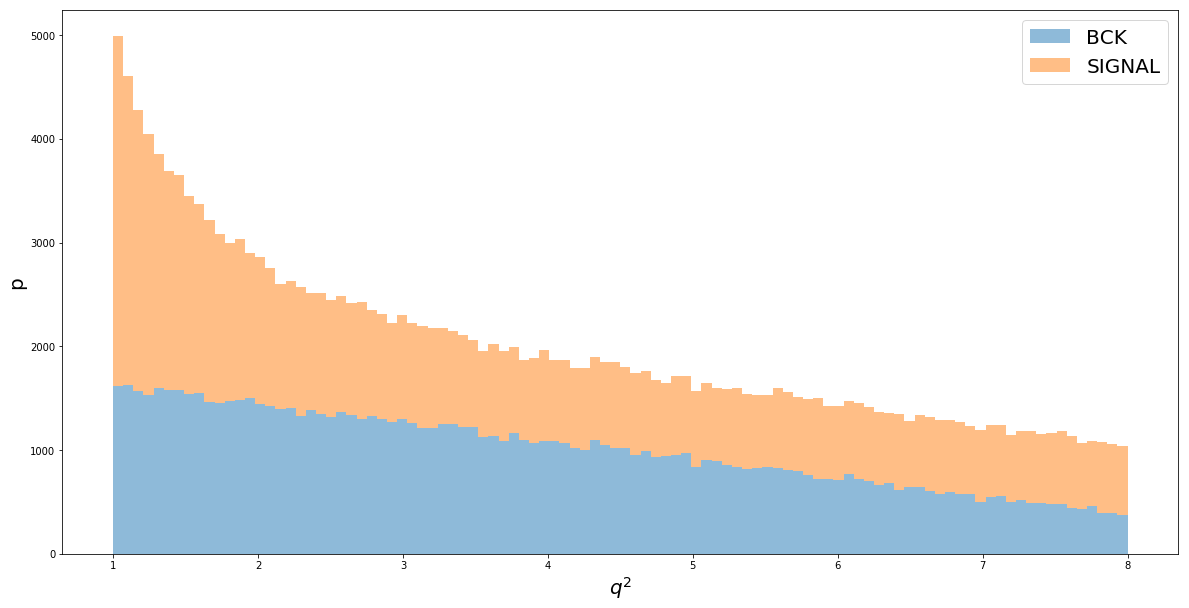

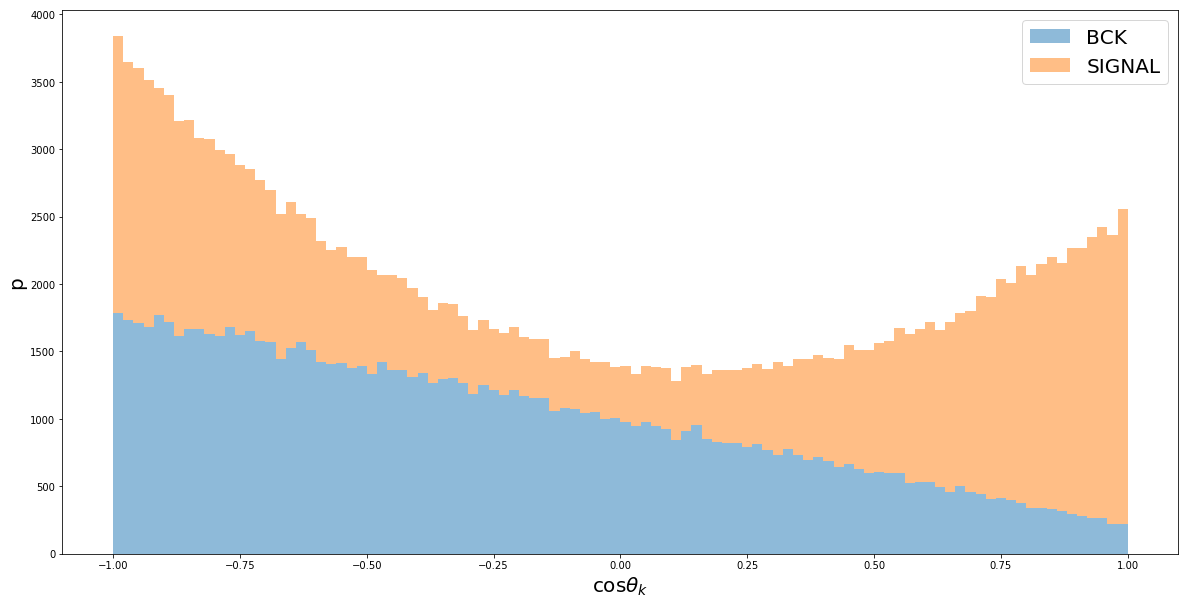

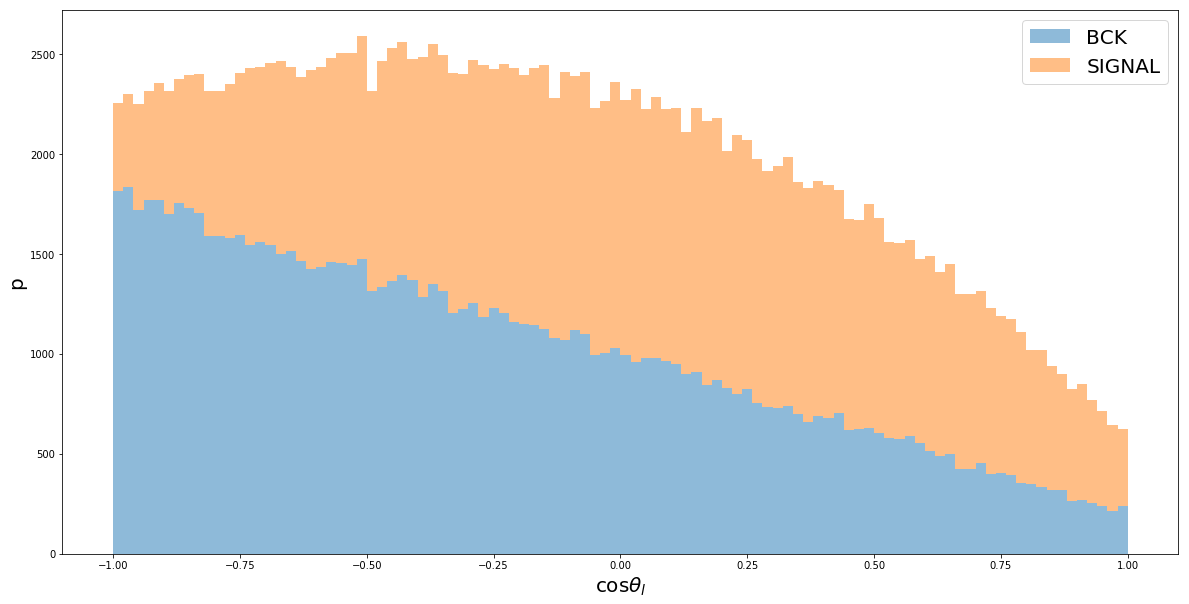

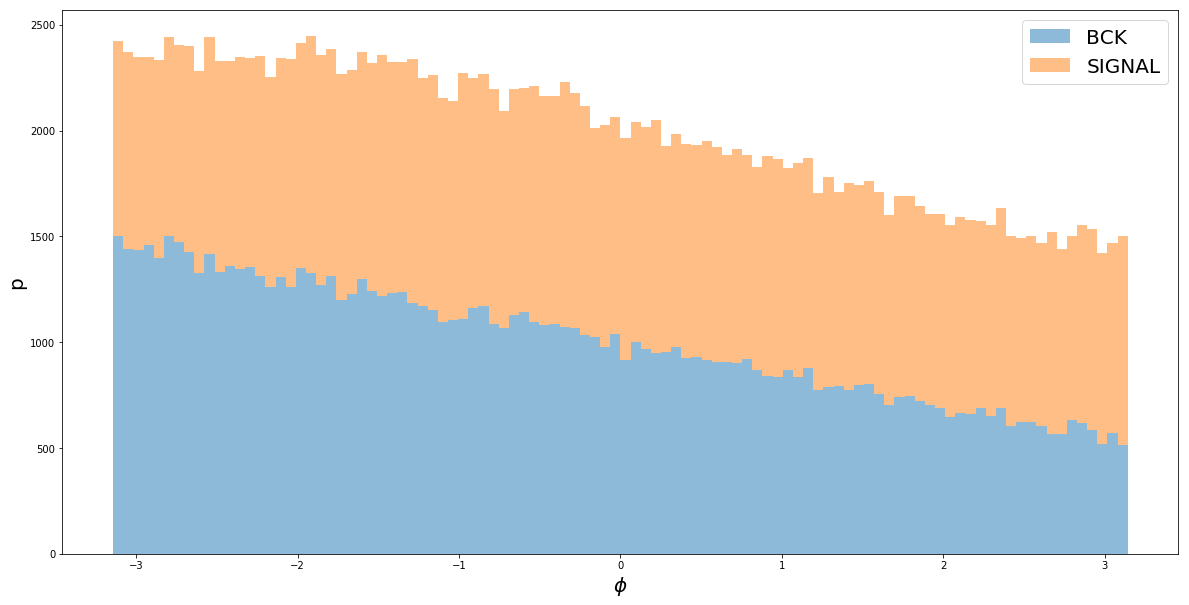

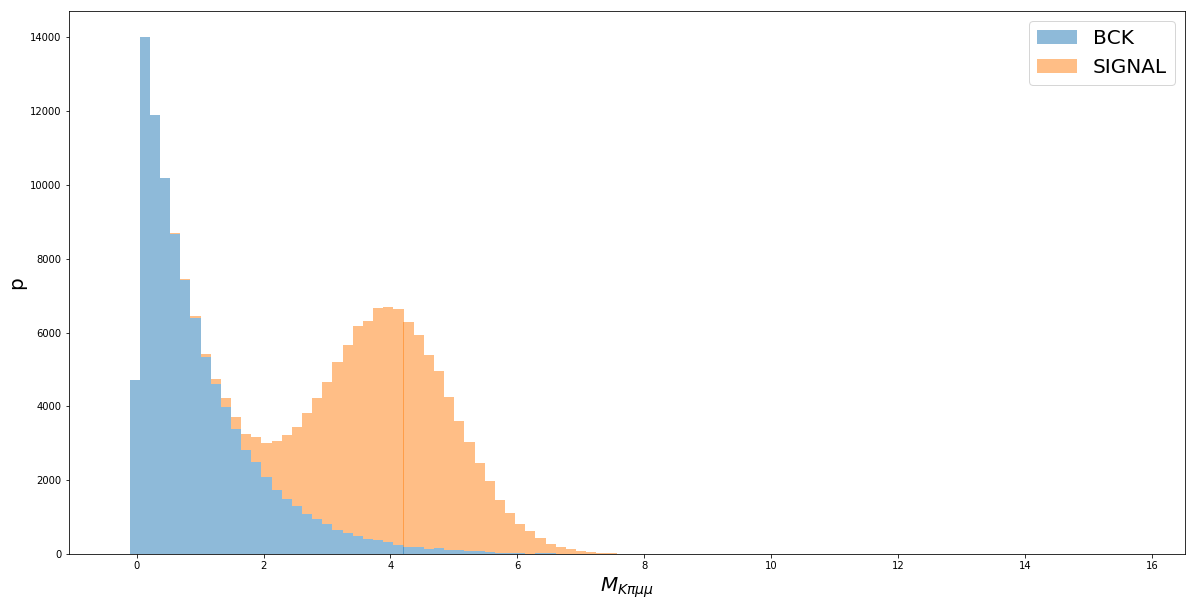

In [59]:
#Plot the observables 

plt.rcParams["figure.figsize"] = (20,10)
Labels=['BCK' , 'SIGNAL']
labels=[r'$q^{2}$' , r'cos$\theta_{k}$' , r'cos$\theta_{l}$' , r'$\phi$' , r'$M_{K\pi\mu\mu}$' ]

for j in range(5):
    plt.hist([events_bck[:,j].numpy() , events_signal[:,j].numpy()]  , alpha=0.5 ,  bins=100 ,stacked=True , label=Labels)
    ax = plt.gca()
    ax.set_xlabel(labels[j] , fontsize=20)
    ax.set_ylabel('p' ,fontsize=20)
    
    ax.legend(fontsize=20)
    plt.show()



In [60]:
from itertools import islice 
import b_meson_fit.mass as mass
import b_meson_fit.background as bkg


Inputt = iter(coeffs) 
splits = [48,8,1,1,1]
sig_coeffs,back_coeffs,[nbar_dat],[n_back],[alpha] = [list(islice(Inputt, elem)) for elem in splits] #this may break

'''
print(back_coeffs, '\n')

print(nbar_dat, '\n')
print(n_back, '\n')
print(alpha, '\n')
'''

def signal_massTF(mass,mean = 4. ,sig = 1. ):
    #print(mass)
    ans = (tf.exp(-tf.math.square(mass - mean, 2.) / (2 * tf.math.square(sig, 2.))))/(sig*tf.math.sqrt(2*np.pi))
    return tf.reshape(ans , [len(ans),])


events_angles, events_mass = tf.split(events,[4,1],axis = 1)


signal = bmfs.pdf(sig_coeffs,events_angles)
masssss=signal_massTF(events_mass)
XXX=tf.math.multiply(signal , masssss)

#print(XXX)
#print(events_mass)
#print(signal)
print(masssss)

#*mass.signal_mass(events_mass)




tf.Tensor(
[3.3275071e-01 3.5851192e-01 2.8164181e-01 ... 2.9154174e-04 4.2960927e-04
 6.6228217e-04], shape=(99999,), dtype=float32)


In [20]:
coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]


# Tests for exnll 

In [61]:
import b_meson_fit.signal as bmfs  
sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8, dtype = 'float32')
ndat = tf.constant(10000, dtype = 'float32')
nback = tf.constant(2000, dtype = 'float32')

coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

events = bmf.signal.generate_all(sig_coeffs,back_coeffs,events_total=10000)
print([i.numpy() for i in coeffs])


[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 100.0, -10.0, 100.0, -80.0, 100.0, -80.0, 100.0, -15.0, 10000.0, 2000.0, 0.8]


In [75]:
bkg.pdfnorm(back_coeffs,events_angles)

<tf.Tensor: id=3481053, shape=(99999,), dtype=float32, numpy=
array([0.07939878, 0.01594275, 0.01779594, ..., 0.02418429, 0.10385238,
       0.15596327], dtype=float32)>

In [71]:
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

def exnll(coeffs,events):
    Inputt = iter(coeffs) 
    splits = [48,8,1,1,1]
    sig_coeffs,back_coeffs,nbar_dat,n_back,alpha = [list(islice(Inputt, elem)) for elem in splits] #this may break

    """
    Extended likelihood fit: ref petredis, patel et all for more!
    Events: Nx5
    """
    alpha = alpha[0]
    nbar_dat = nbar_dat[0]
    n_back = n_back[0]
    n_sig = nbar_dat*alpha
    events_angles, events_mass = tf.split(events,[4,1],axis = 1)

    signal = tf.math.multiply(bmfs.pdf(sig_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.signal_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    backg = tf.math.multiply(bkg.pdfnorm(back_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.background_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    print(max(signal))
    print(max(backg)
    likelihood = -tf.reduce_sum(
        tf.math.log(
            n_sig*signal
            +n_back*backg
        )
    )
    poisson_counting = (-1*tf.math.multiply(tf.cast(tf.shape(events)[0],dtype = 'float32'),tf.math.log(n_sig + n_back)))+ n_sig + n_back
    print(poisson_counting)
    return (likelihood + poisson_counting)

exnll(coeffs,events)

tf.Tensor(0.021372, shape=(), dtype=float32)
tf.Tensor(0.19092438, shape=(), dtype=float32)
Likelihood : tf.Tensor(-31045.871, shape=(), dtype=float32)
Poisson : tf.Tensor(-82094.195, shape=(), dtype=float32)


<tf.Tensor: id=2480959, shape=(), dtype=float32, numpy=-113140.06>

In [70]:
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]
def exnll(coeffs,events):
    Inputt = iter(coeffs) 
    splits = [48,8,1,1,1]
    sig_coeffs,back_coeffs,nbar_dat,n_back,alpha = [list(islice(Inputt, elem)) for elem in splits] #this may break

    """
    Extended likelihood fit: ref petredis, patel et all for more!
    Events: Nx5
    """
    alpha = alpha[0]
    nbar_dat = nbar_dat[0]
    n_back = n_back[0]
    n_sig = nbar_dat*alpha
    events_angles, events_mass = tf.split(events,[4,1],axis = 1)

    signal = tf.math.multiply(bmfs.pdf(sig_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.signal_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    
    backg = tf.math.multiply(bkg.pdf(back_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.background_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
   
    likelihood = -tf.reduce_sum(tf.math.log(tf.math.add(tf.math.multiply(n_sig,signal),tf.math.multiply(n_back,backg))))
    print('Actual likelihood')
    print(likelihood)
    poisson_counting = -tf.math.multiply(tf.cast(tf.shape(events)[0],dtype = 'float32'),tf.math.log(n_sig + n_back)) +n_sig+ n_back
    print('Poisson term')
    print(poisson_counting)
    return (likelihood + poisson_counting)

print(exnll(coeffs,events))
print('\n')
print(bmfs.exnll(coeffs,events))

Actual likelihood
tf.Tensor(-31045.871, shape=(), dtype=float32)
Poisson term
tf.Tensor(-82094.195, shape=(), dtype=float32)
tf.Tensor(-113140.06, shape=(), dtype=float32)


tf.Tensor(-218330.08, shape=(), dtype=float32)
tf.Tensor(-82094.195, shape=(), dtype=float32)
tf.Tensor(-300424.28, shape=(), dtype=float32)


In [ ]:
events_angles, events_mass = tf.split(events,[4,1],axis = 1)

a=mass.background_mass(events_mass)
plt.hist(events_mass)
plt.show()
print(max(a))

KeyboardInterrupt: 

# Tests fit with Background 


In [ ]:

sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8, dtype = 'float32')
ndat = tf.constant(10000, dtype = 'float32')
nback = tf.constant(2000, dtype = 'float32')

'''
print(sig_coeffs , '\n')
print(back_coeffs, '\n')
print(ndat, '\n')
print(nback)
'''
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

events = bmf.signal.generate_all(sig_coeffs,back_coeffs,events_total=10000)
print([i.numpy() for i in coeffs])
optimizer = Optimizer_Extended(coeffs,events)
#print(optimizer._normalized_nll())


for i in range(10000000):
    optimizer.minimize()
    #print(optimizer.fit_coeffs[0])
    if optimizer.converged():
        print(optimizer._normalized_nll())
        break
print("not converged")

print([i.numpy() for i in optimizer.fit_coeffs] )

# III ) Fitting with background signal 

In [42]:
#perform fits using the migrad routine (minuit) and AMSGrad (tensorflow)
FX=fix_alphas 

optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'DEFAULT' , fixed=FX , verbose=True )
optimizeMigrad , coeffMigrad = toy_signalSM.minuitfit(init= 'DEFAULT' , fixed=FX , verbose=True)



 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for tensorflow fit: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]

  Fitted coefficients :  [-4.140053, -0.15184344, 6.8183246, -0.08432649, -0.0018230017, 0.4660742, -0.13008726, -0.